In [1]:
import os
os.chdir('JQ/PI-SDE')
import pandas as pd
import torch
import matplotlib.pyplot as plt
from types import SimpleNamespace
import numpy as np
from src.evaluation import derive_model

from joblib import load
um = load('data/Weinreb/alltime/um_transformer.joblib')

In [3]:
path_for_prescient = '../OtherMethods/prescient/RESULTS/Weinreb/'+ \
                     'alltime/none/seed_0/Endes-last.npy'
path_for_prescient_kegg = '../OtherMethods/prescient/RESULTS/Weinreb/'+ \
                          'alltime/kegg/seed_0/Endes-last.npy'

path_for_TrajectoryNet = '../OtherMethods/TrajectoryNet-master/results/Weinreb/'+ \
                         'alltime/Endes.npy'

In [4]:
path = "RESULTS/Weinreb/softplus-400_400-0.5-const-0.1-0.1-0.005/seed_0/alltime/config.pt"
config = SimpleNamespace(**torch.load(path))
model, x, y, device = derive_model(config, ckpt_name = 'epoch_003000')

x_all = torch.cat(x)
x_all_2dim = um.transform(x_all.cpu().numpy())

In [5]:
np.random.seed(42)
sample_num = 50

Samples = []
for ii, t in enumerate(y):
    N = x[ii].shape[0]
    Index = np.random.choice(range(N), sample_num,replace=False)
    X = x[ii][Index]
    t = (((torch.ones(sample_num)) * t).unsqueeze(1))
    Xt = torch.cat([X, t], dim=1).to(device)
    Samples.append(Xt)

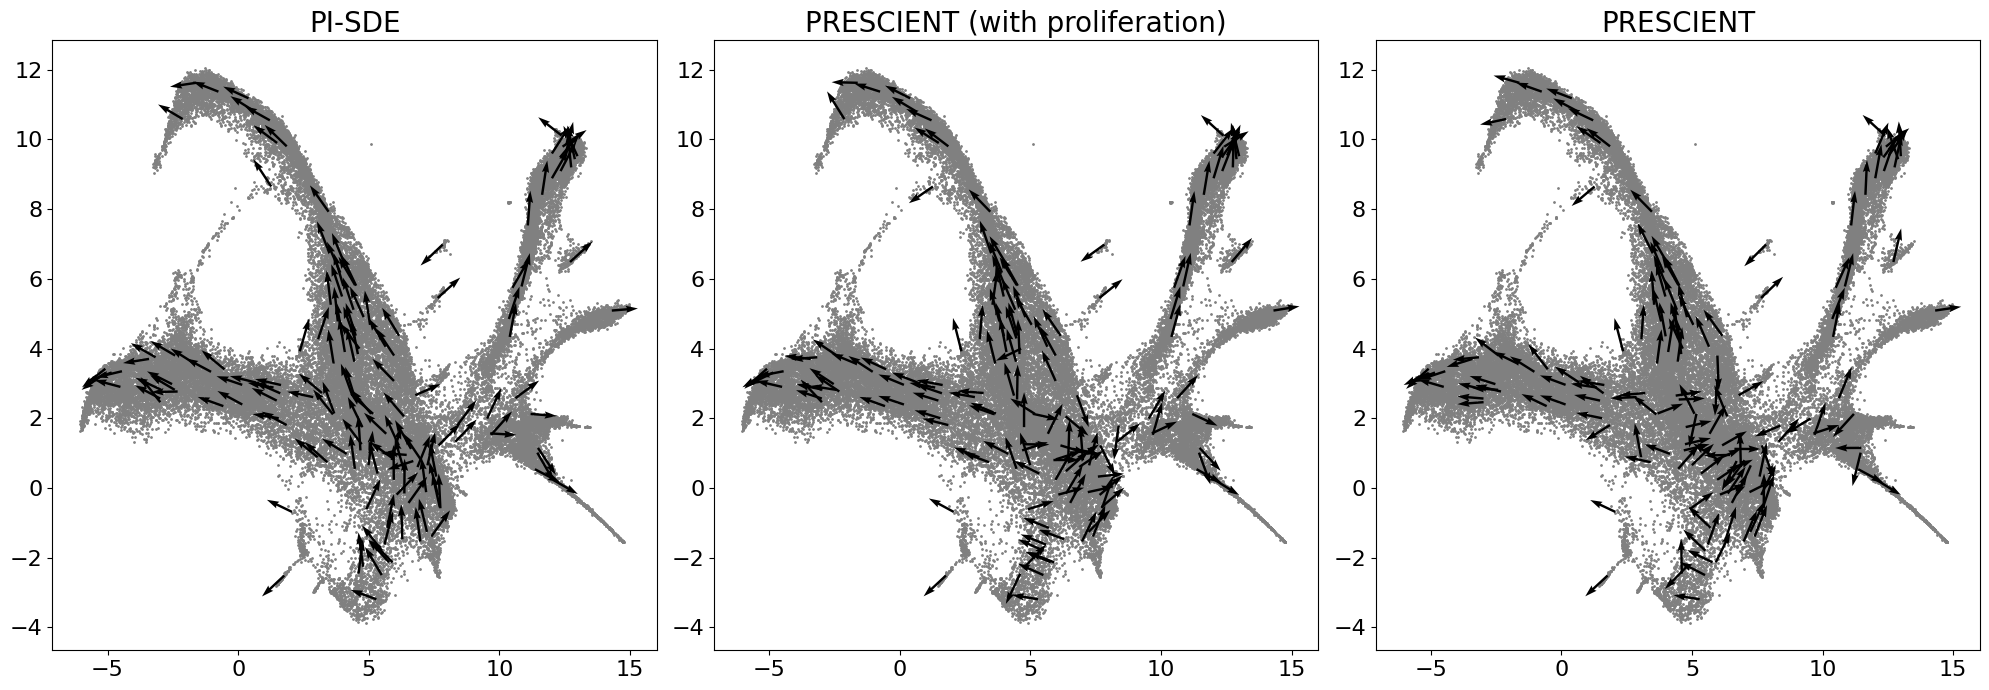

In [6]:
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 3, width_ratios=[1, 1, 1])

plt.figure(figsize=(20, 7))

ax0 = plt.subplot(gs[0, 0])
ax0.scatter(x_all_2dim[:,0], x_all_2dim[:,1], s = 1, color = 'gray')
ii = 0
for Xt in Samples:
    X_start = Xt[:,0:-1]
    X_end = X_start  + model._func._drift(Xt)
    x_end_umap = um.transform(X_end.detach().cpu().numpy())
    x_start_umap = um.transform(X_start.detach().cpu().numpy())
    xv = x_end_umap - x_start_umap
    xv = xv / np.linalg.norm(xv, axis = 1)[:,np.newaxis] * 1.5

    ax0.quiver(x_start_umap[:,0],  x_start_umap[:,1], xv[:,0], xv[:,1], scale = 1.5, scale_units = 'xy', 
        width = .004)
    ii=ii+1
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.tick_params(axis='x', labelsize=16) 
ax0.tick_params(axis='y', labelsize=16)
ax0.set_title('PI-SDE', fontsize=20)


ax1 = plt.subplot(gs[0, 1])
Endes_prescient_kegg = np.load(path_for_prescient_kegg)
ax1.scatter(x_all_2dim[:,0], x_all_2dim[:,1], s = 1, color = 'gray')
ii = 0
for X_start, X_end in zip(Samples,Endes_prescient_kegg):
    X_start = X_start[:,0:-1]
    x_end_umap = um.transform(X_end)
    x_start_umap = um.transform(X_start.detach().cpu().numpy())
    xv = x_end_umap - x_start_umap
    xv = xv / np.linalg.norm(xv, axis = 1)[:,np.newaxis] *1.5

    ax1.quiver(x_start_umap[:,0],  x_start_umap[:,1], xv[:,0], xv[:,1], scale = 1.5, scale_units = 'xy', 
        width = .004)
    ii=ii+1
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', labelsize=16) 
ax1.tick_params(axis='y', labelsize=16)
ax1.set_title('PRESCIENT (with proliferation)', fontsize=20)

ax2 = plt.subplot(gs[0, 2])
Endes_prescient = np.load(path_for_prescient)
ax2.scatter(x_all_2dim[:,0], x_all_2dim[:,1], s = 1, color = 'gray')
ii = 0
for X_start, X_end in zip(Samples,Endes_prescient):
    X_start = X_start[:,0:-1]
    x_end_umap = um.transform(X_end)
    x_start_umap = um.transform(X_start.detach().cpu().numpy())
    xv = x_end_umap - x_start_umap
    xv = xv / np.linalg.norm(xv, axis = 1)[:,np.newaxis] *1.5

    ax2.quiver(x_start_umap[:,0],  x_start_umap[:,1], xv[:,0], xv[:,1], scale = 1.5, scale_units = 'xy', 
        width = .004)
    ii=ii+1
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', labelsize=16) 
ax2.tick_params(axis='y', labelsize=16)
ax2.set_title('PRESCIENT', fontsize=20)

plt.tight_layout()
plt.show()

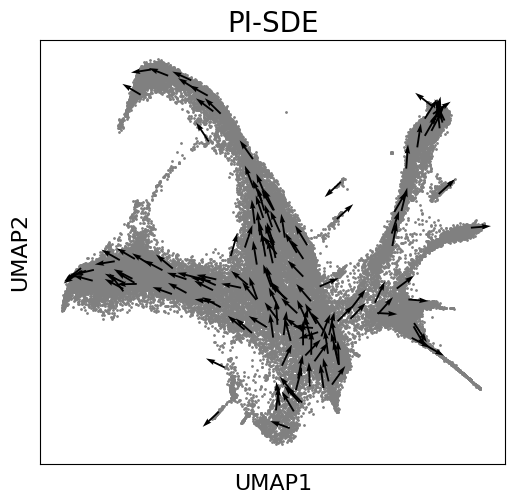

In [8]:
fig, ax = plt.subplots(figsize = (6,5.5))

ax.scatter(x_all_2dim[:,0], x_all_2dim[:,1], s = 1, color = 'gray')

ii = 0
for Xt in Samples:
    X_start = Xt[:,0:-1]
    X_end = X_start  + model._func._drift(Xt)
    x_end_umap = um.transform(X_end.detach().cpu().numpy())
    x_start_umap = um.transform(X_start.detach().cpu().numpy())
    xv = x_end_umap - x_start_umap
    xv = xv / np.linalg.norm(xv, axis = 1)[:,np.newaxis] * 1.5

    ax.quiver(x_start_umap[:,0],  x_start_umap[:,1], xv[:,0], xv[:,1], scale = 1.5, scale_units = 'xy', 
        width = .004)
    ii=ii+1
ax.set_xlabel('UMAP1',fontsize=16)
ax.set_ylabel('UMAP2',fontsize=16)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('PI-SDE', fontsize=20)
plt.show()

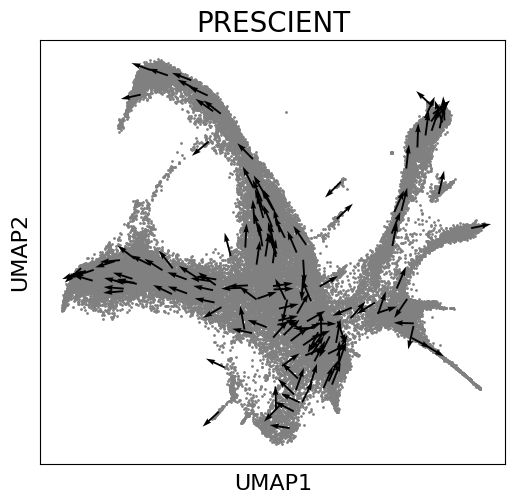

In [9]:
Endes_prescient = np.load(path_for_prescient)

fig, ax = plt.subplots(figsize = (6,5.5))

ax.scatter(x_all_2dim[:,0], x_all_2dim[:,1], s = 1, color = 'gray')

ii = 0
for X_start, X_end in zip(Samples,Endes_prescient):
    x_end_umap = um.transform(X_end)
    x_start_umap = um.transform(X_start.detach().cpu().numpy())
    xv = x_end_umap - x_start_umap
    xv = xv / np.linalg.norm(xv, axis = 1)[:,np.newaxis] *1.5

    ax.quiver(x_start_umap[:,0],  x_start_umap[:,1], xv[:,0], xv[:,1], scale = 1.5, scale_units = 'xy', 
        width = .004)
    ii=ii+1
ax.set_xlabel('UMAP1',fontsize=16)
ax.set_ylabel('UMAP2',fontsize=16)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('PRESCIENT', fontsize=20)
plt.show()

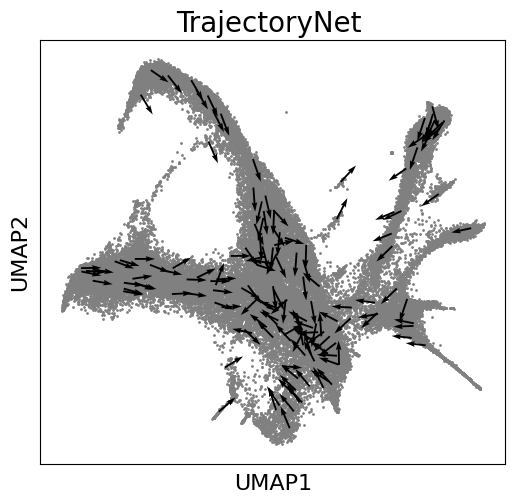

In [10]:
Endes_TrajectoryNet = np.load(path_for_TrajectoryNet)

fig, ax = plt.subplots(figsize = (6,5.5))

ax.scatter(x_all_2dim[:,0], x_all_2dim[:,1], s = 1, color = 'gray')

ii = 0
for X_start, X_end in zip(Samples,Endes_TrajectoryNet):
    x_end_umap = um.transform(X_end)
    x_start_umap = um.transform(X_start.detach().cpu().numpy())
    xv = x_end_umap - x_start_umap
    xv = xv / np.linalg.norm(xv, axis = 1)[:,np.newaxis] *1.5

    ax.quiver(x_start_umap[:,0],  x_start_umap[:,1], xv[:,0], xv[:,1], scale = 1.5, scale_units = 'xy', 
        width = .004)
    ii=ii+1
ax.set_xlabel('UMAP1',fontsize=16)
ax.set_ylabel('UMAP2',fontsize=16)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('TrajectoryNet ', fontsize=20)
plt.show()